In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',30)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('C://Data Science/Jupyter Notebook/datasets/ANZ synthesised transaction dataset.xlsx')
print(data.shape)
data.head()

(12043, 23)


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# Variable Identification

In [3]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [4]:
# Numerical Columns

def num_cols(data):
    return data.select_dtypes(include='number').columns.tolist()

num_cols(data)

['card_present_flag', 'merchant_code', 'balance', 'age', 'amount']

In [5]:
# Categorical Columns

def cat_cols(data):
    return data.select_dtypes(include='object').columns.tolist()

cat_cols(data)

['status',
 'bpay_biller_code',
 'account',
 'currency',
 'long_lat',
 'txn_description',
 'merchant_id',
 'first_name',
 'gender',
 'merchant_suburb',
 'merchant_state',
 'extraction',
 'transaction_id',
 'country',
 'customer_id',
 'merchant_long_lat',
 'movement']

In [6]:
# Data Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [7]:
# Data Statistics

data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [8]:
# Unique values of categorical features

print("Status :",data.status.unique().tolist())
print("\nCard present flag :",data.card_present_flag.unique().tolist())
print("\nBpay Biller Code :",data.bpay_biller_code.unique().tolist())
print("\nCurrency :",data.currency.unique().tolist())
print("\nTransaction Description :",data.txn_description.unique().tolist())
print("\nGender :",data.gender.unique().tolist())
print("\nAge :",data.age.unique().tolist())
print("\nCountry :",data.country.unique().tolist())
print("\nMovement :",data.movement.unique().tolist())

Status : ['authorized', 'posted']

Card present flag : [1.0, 0.0, nan]

Bpay Biller Code : [nan, 0, ' THE DISCOUNT CHEMIST GROUP', ' LAND WATER & PLANNING East Melbourne']

Currency : ['AUD']

Transaction Description : ['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY', 'PHONE BANK']

Gender : ['F', 'M']

Age : [26, 38, 40, 20, 43, 27, 19, 23, 30, 46, 47, 24, 37, 25, 21, 39, 31, 34, 18, 78, 22, 42, 33, 28, 44, 69, 35, 41, 53, 64, 50, 52, 29]

Country : ['Australia']

Movement : ['debit', 'credit']


# Missing Values

In [9]:
def missing_vals(data):
    count = data.isnull().sum()
    percent = (data.isnull().sum()/data.shape[0])*100
    return pd.DataFrame({"Count":count,"Percentage":percent})

missing_vals(data)

,Count,Percentage
status,0,0.000000
card_present_flag,4326,35.921282
bpay_biller_code,11158,92.651333
account,0,0.000000
currency,0,0.000000
long_lat,0,0.000000
txn_description,0,0.000000
merchant_id,4326,35.921282
merchant_code,11160,92.667940
first_name,0,0.000000


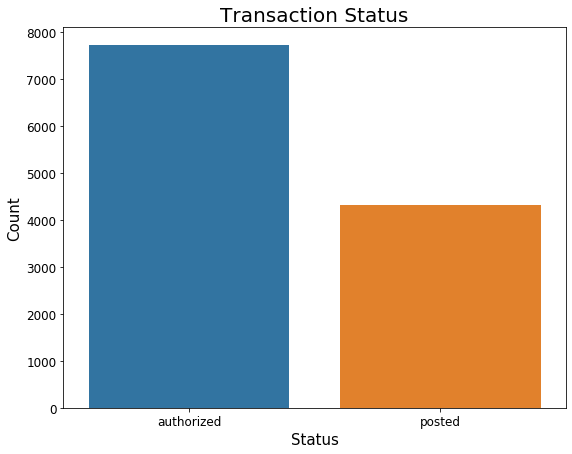

In [10]:
# Transaction Status

plt.figure(figsize=[9,7])
sns.countplot(data.status)
plt.title("Transaction Status",fontsize=20)
plt.xlabel("Status",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**Authorized** means transaction is pending   
**Post** means the transaction is complete

Number of Null values in Card present flag is 4326


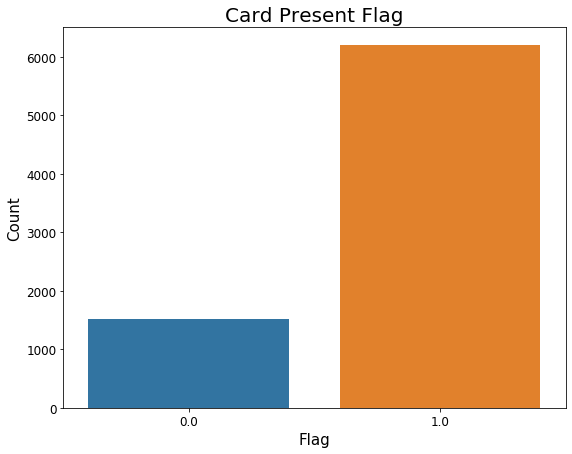

In [11]:
# Card present flag 
# most likely 1.0 = active and 0.0 = inactive

plt.figure(figsize=[9,7])
sns.countplot(data.card_present_flag)
plt.title("Card Present Flag",fontsize=20)
plt.xlabel("Flag",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

print("Number of Null values in Card present flag is",data.card_present_flag.isnull().sum())

Number of Null values in Bpay Biller code is 11158

Value Counts :

 0                                        883
 THE DISCOUNT CHEMIST GROUP                1
 LAND WATER & PLANNING East Melbourne      1
Name: bpay_biller_code, dtype: int64


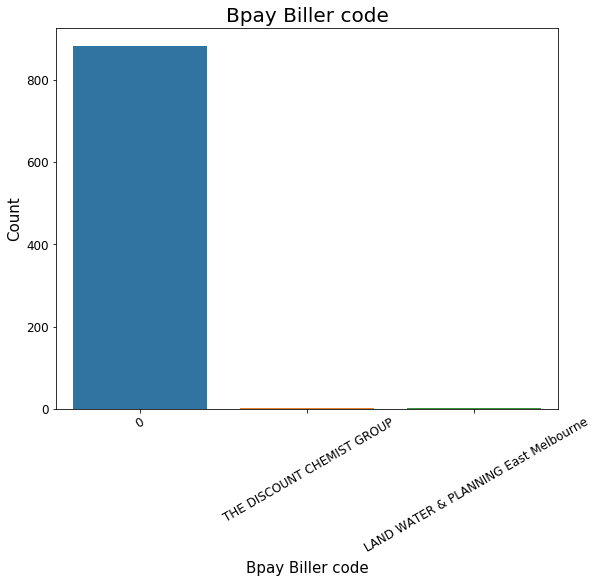

In [12]:
# Transaction Status

plt.figure(figsize=[9,7])
sns.countplot(data.bpay_biller_code)
plt.title("Bpay Biller code",fontsize=20)
plt.xlabel("Bpay Biller code",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12,rotation=30)
plt.yticks(fontsize=12);

print("Number of Null values in Bpay Biller code is",data.bpay_biller_code.isnull().sum())
print("\nValue Counts :\n\n",data.bpay_biller_code.value_counts())

In [13]:
# Account

print("Account Value counts :\n",data.account.value_counts())

Account Value counts :
 ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64


In [14]:
# Latitude and Longitude

data['latitude'] = data.long_lat.str[6:].astype('float')
data['longitude'] = data.long_lat.str[:6].astype('float')

data_cols = ['status','card_present_flag','bpay_biller_code','account','currency','latitude','longitude',
             'txn_description','merchant_id','merchant_code','first_name','balance','date','gender','age',
             'merchant_suburb','merchant_state','extraction','amount','transaction_id','country',
             'customer_id','merchant_long_lat','movement']

data = data[data_cols]
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,latitude,longitude,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,-27.95,153.41,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,-27.95,153.41,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,-33.94,151.23,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,-27.66,153.10,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,-27.95,153.41,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


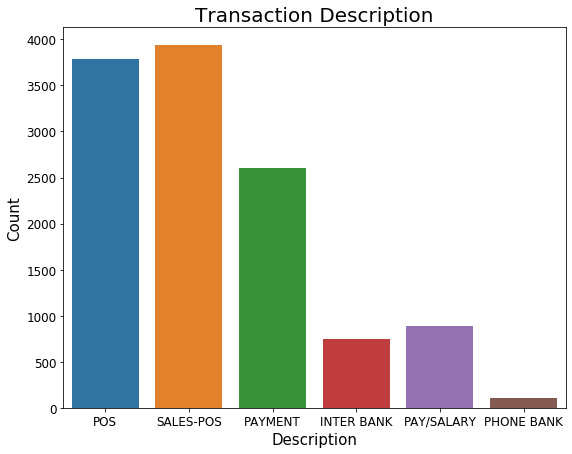

In [15]:
# Transaction Description

plt.figure(figsize=[9,7])
sns.countplot(data.txn_description)
plt.title("Transaction Description",fontsize=20)
plt.xlabel("Description",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [16]:
# Date column

data["Day"] = data.date.apply(lambda x:x.day)
data["Month"] = data.date.apply(lambda x:x.month)
data["Year"] = data.date.apply(lambda x:x.year)

data.head()

,status,card_present_flag,bpay_biller_code,account,currency,latitude,longitude,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Day,Month,Year
0,authorized,1.0,NaN,ACC-1598451071,AUD,-27.95,153.41,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,1,8,2018
1,authorized,0.0,NaN,ACC-1598451071,AUD,-27.95,153.41,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,1,8,2018
2,authorized,1.0,NaN,ACC-1222300524,AUD,-33.94,151.23,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,1,8,2018
3,authorized,1.0,NaN,ACC-1037050564,AUD,-27.66,153.10,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,1,8,2018
4,authorized,1.0,NaN,ACC-1598451071,AUD,-27.95,153.41,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,1,8,2018


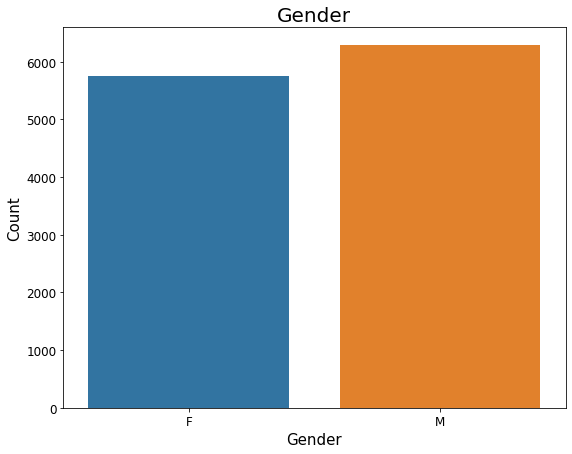

In [17]:
# Gender

plt.figure(figsize=[9,7])
sns.countplot(data.gender)
plt.title("Gender",fontsize=20)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

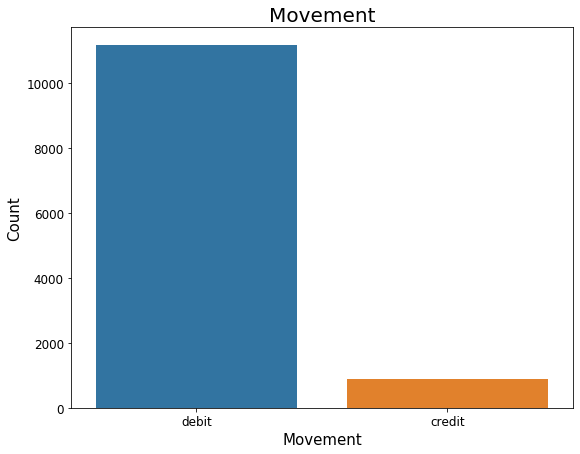

In [18]:
# Movement

plt.figure(figsize=[9,7])
sns.countplot(data.movement)
plt.title("Movement",fontsize=20)
plt.xlabel("Movement",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [19]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,latitude,longitude,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Day,Month,Year
0,authorized,1.0,NaN,ACC-1598451071,AUD,-27.95,153.41,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,1,8,2018
1,authorized,0.0,NaN,ACC-1598451071,AUD,-27.95,153.41,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,1,8,2018
2,authorized,1.0,NaN,ACC-1222300524,AUD,-33.94,151.23,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,1,8,2018
3,authorized,1.0,NaN,ACC-1037050564,AUD,-27.66,153.10,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,1,8,2018
4,authorized,1.0,NaN,ACC-1598451071,AUD,-27.95,153.41,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,1,8,2018


In [20]:
data.groupby('customer_id')['amount'].mean()

customer_id
CUS-1005756958    222.862603
CUS-1117979751    339.843700
CUS-1140341822    212.632500
CUS-1147642491    245.600169
CUS-1196156254    147.145796
                     ...    
CUS-72755508      197.213276
CUS-809013380     151.694274
CUS-860700529      77.681888
CUS-880898248     146.954487
CUS-883482547     205.839382
Name: amount, Length: 100, dtype: float64

In [21]:
data.account.value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

In [22]:
data.Month.value_counts()

10    4087
9     4013
8     3943
Name: Month, dtype: int64

In [23]:
data.Day.value_counts()

17    446
28    445
3     426
19    424
26    422
5     417
14    416
12    412
18    412
21    411
27    409
2     405
24    405
4     402
10    400
22    399
13    395
11    394
25    388
15    383
9     382
6     381
1     377
29    372
7     371
20    369
8     365
23    362
30    339
31    294
16    220
Name: Day, dtype: int64

In [24]:
data.groupby(["customer_id","Month"])['amount'].sum().nlargest(10)

customer_id     Month
CUS-1816693151  10       19420.12
CUS-2738291516  9        18696.51
CUS-261674136   10       16487.20
CUS-3142625864  10       16056.03
CUS-2738291516  8        15372.17
CUS-527400765   10       15357.99
CUS-1617121891  8        15322.12
CUS-1271030853  10       15311.45
CUS-1462656821  8        14963.04
CUS-1196156254  8        14695.73
Name: amount, dtype: float64

# Bivariate

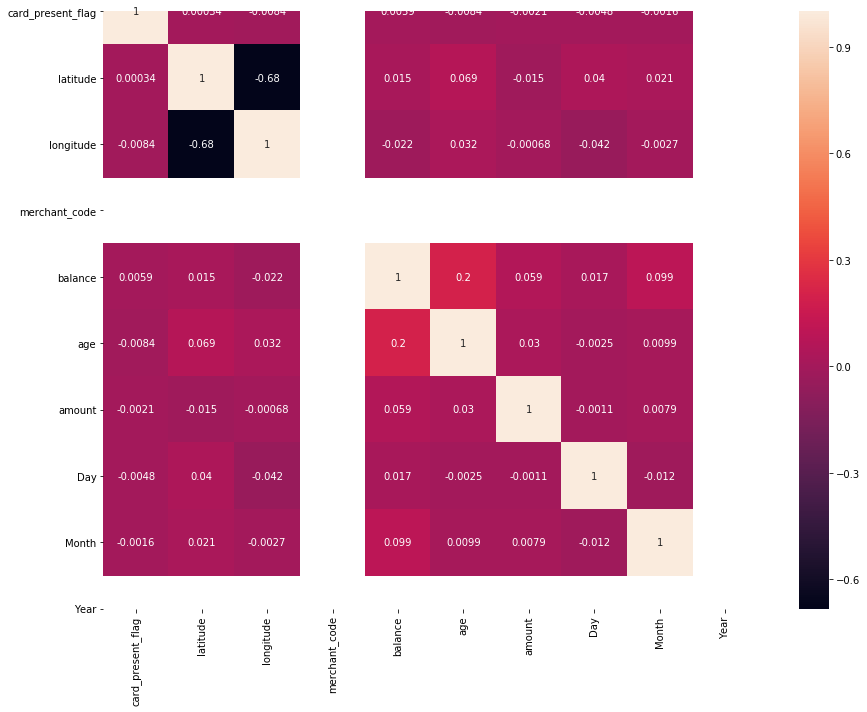

In [25]:
plt.figure(figsize=[13,10])
sns.heatmap(data.corr(),annot=True)
plt.tight_layout()

In [26]:
date_mvmt_amt_max = data.groupby(['date','movement'])['amount'].max().reset_index()
date_mvmt_amt_max

,date,movement,amount
0,2018-08-01,credit,3903.95
1,2018-08-01,debit,937.73
2,2018-08-02,credit,3195.01
3,2018-08-02,debit,1692.56
4,2018-08-03,credit,3785.78
...,...,...,...
151,2018-10-29,debit,113.67
152,2018-10-30,credit,4132.23
153,2018-10-30,debit,111.30
154,2018-10-31,credit,2639.76


In [27]:
date_cred_amt_max = date_mvmt_amt_max[date_mvmt_amt_max['movement']=='credit'].drop('movement',axis=1).set_index('date')
date_cred_amt_max = pd.Series(date_cred_amt_max.amount,index=date_cred_amt_max.index)
date_cred_amt_max

date
2018-08-01    3903.95
2018-08-02    3195.01
2018-08-03    3785.78
2018-08-06    4405.30
2018-08-07    6024.49
               ...   
2018-10-25    3195.01
2018-10-26    6107.23
2018-10-29    4405.30
2018-10-30    4132.23
2018-10-31    2639.76
Name: amount, Length: 65, dtype: float64

In [28]:
date_deb_amt_max = date_mvmt_amt_max[date_mvmt_amt_max['movement']=='debit'].drop('movement',axis=1).set_index('date')
date_deb_amt_max = pd.Series(date_deb_amt_max.amount,index=date_deb_amt_max.index)
date_deb_amt_max

date
2018-08-01     937.73
2018-08-02    1692.56
2018-08-03    1233.80
2018-08-04    1909.04
2018-08-05     546.94
               ...   
2018-10-27    1377.00
2018-10-28    1771.00
2018-10-29     113.67
2018-10-30     111.30
2018-10-31     652.93
Name: amount, Length: 91, dtype: float64

In [29]:
date_index = np.arange('2018-08-01','2018-11-02',dtype='datetime64')

<IPython.core.display.Javascript object>


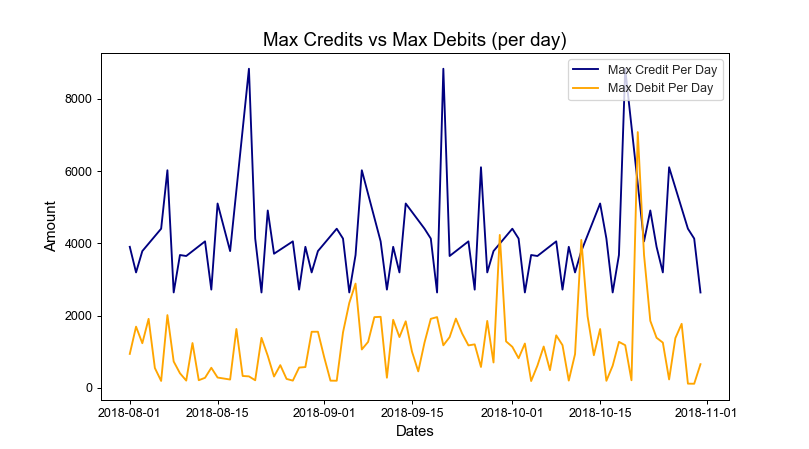

C:\Users\admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Amount')

In [30]:
%matplotlib notebook

plt.figure(figsize=[9,5])
plt.plot(date_cred_amt_max,c='navy')
plt.plot(date_deb_amt_max,c='orange')
sns.set_style('whitegrid')
plt.legend(["Max Credit Per Day","Max Debit Per Day"])
plt.title("Max Credits vs Max Debits (per day)",fontsize=15)
plt.xlabel("Dates",fontsize=12)
plt.ylabel("Amount",fontsize=12)

In [31]:
data

,status,card_present_flag,bpay_biller_code,account,currency,latitude,longitude,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Day,Month,Year
0,authorized,1.0,NaN,ACC-1598451071,AUD,-27.95,153.41,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,1,8,2018
1,authorized,0.0,NaN,ACC-1598451071,AUD,-27.95,153.41,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,1,8,2018
2,authorized,1.0,NaN,ACC-1222300524,AUD,-33.94,151.23,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,1,8,2018
3,authorized,1.0,NaN,ACC-1037050564,AUD,-27.66,153.10,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,1,8,2018
4,authorized,1.0,NaN,ACC-1598451071,AUD,-27.95,153.41,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,1,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,-29.47,149.83,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,31,10,2018
12039,authorized,1.0,NaN,ACC-1608363396,AUD,-33.87,151.22,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,31,10,2018
12040,authorized,1.0,NaN,ACC-3827517394,AUD,-33.89,151.12,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,31,10,2018
12041,authorized,1.0,NaN,ACC-2920611728,AUD,-37.76,144.96,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,31,10,2018


In [31]:
gen_date_amt = data[data['movement']=='credit'].groupby(['gender','date'])['amount'].max().reset_index()

In [32]:
fem_date_amt = gen_date_amt[gen_date_amt['gender']=='F'].drop('gender',axis=1).set_index('date')
male_date_amt = gen_date_amt[gen_date_amt['gender']=='M'].drop('gender',axis=1).set_index('date')

<IPython.core.display.Javascript object>


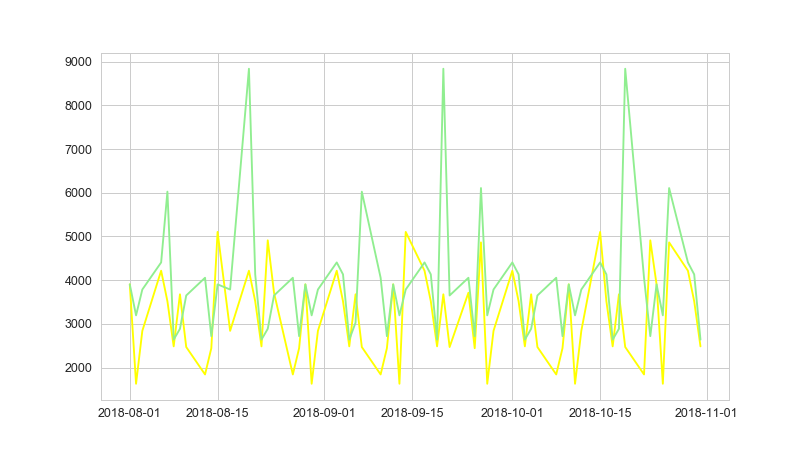

In [33]:
%matplotlib notebook

plt.figure(figsize=[9,5])
plt.plot(fem_date_amt,c='yellow')
plt.plot(male_date_amt,c='lightgreen')

In [36]:
date_move_amt_sum = data.groupby(['date','movement'])['amount'].sum().reset_index()

In [37]:
total_credit_per_day = date_move_amt_sum[date_move_amt_sum['movement']=='credit'].drop('movement',axis=1).set_index('date')
total_credit_per_day

,amount
date,
2018-08-01,24321.50
2018-08-02,14228.23
2018-08-03,30060.68
2018-08-06,39056.91
2018-08-07,25997.51
...,...
2018-10-25,14228.23
2018-10-26,41031.53
2018-10-29,36029.96


In [38]:
total_debit_per_day = date_move_amt_sum[date_move_amt_sum['movement']=='debit'].drop('movement',axis=1).set_index('date')
total_debit_per_day

,amount
date,
2018-08-01,5546.44
2018-08-02,7558.09
2018-08-03,8035.90
2018-08-04,6296.05
2018-08-05,4426.50
...,...
2018-10-27,6971.58
2018-10-28,8438.11
2018-10-29,2519.18


<IPython.core.display.Javascript object>


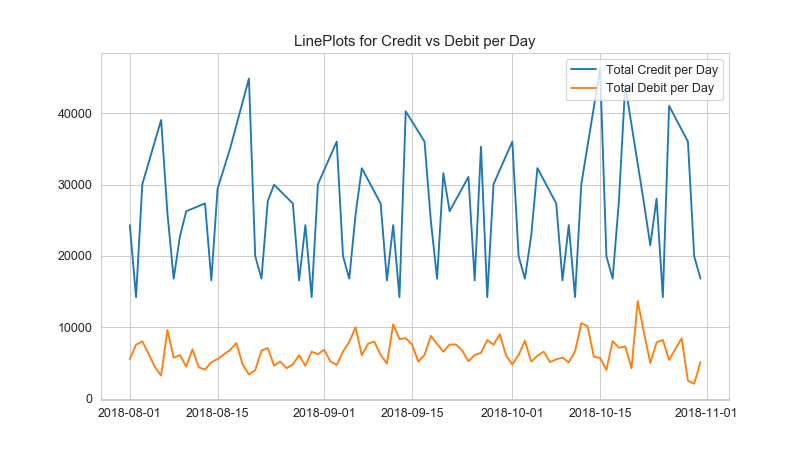

Text(0.5, 1.0, 'LinePlots for Credit vs Debit per Day')

In [39]:
%matplotlib notebook

plt.figure(figsize=[9,5])
plt.plot(total_credit_per_day)
plt.plot(total_debit_per_day)
plt.legend(['Total Credit per Day','Total Debit per Day'],loc='upper right')
plt.title('LinePlots for Credit vs Debit per Day')

In [39]:
data[data['movement']=='debit']

,status,card_present_flag,bpay_biller_code,account,currency,latitude,longitude,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Day,Month,Year
0,authorized,1.0,NaN,ACC-1598451071,AUD,-27.95,153.41,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,1,8,2018
1,authorized,0.0,NaN,ACC-1598451071,AUD,-27.95,153.41,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,1,8,2018
2,authorized,1.0,NaN,ACC-1222300524,AUD,-33.94,151.23,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,1,8,2018
3,authorized,1.0,NaN,ACC-1037050564,AUD,-27.66,153.10,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,1,8,2018
4,authorized,1.0,NaN,ACC-1598451071,AUD,-27.95,153.41,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,1,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,-29.47,149.83,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,31,10,2018
12039,authorized,1.0,NaN,ACC-1608363396,AUD,-33.87,151.22,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,31,10,2018
12040,authorized,1.0,NaN,ACC-3827517394,AUD,-33.89,151.12,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,31,10,2018
12041,authorized,1.0,NaN,ACC-2920611728,AUD,-37.76,144.96,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,31,10,2018


<IPython.core.display.Javascript object>


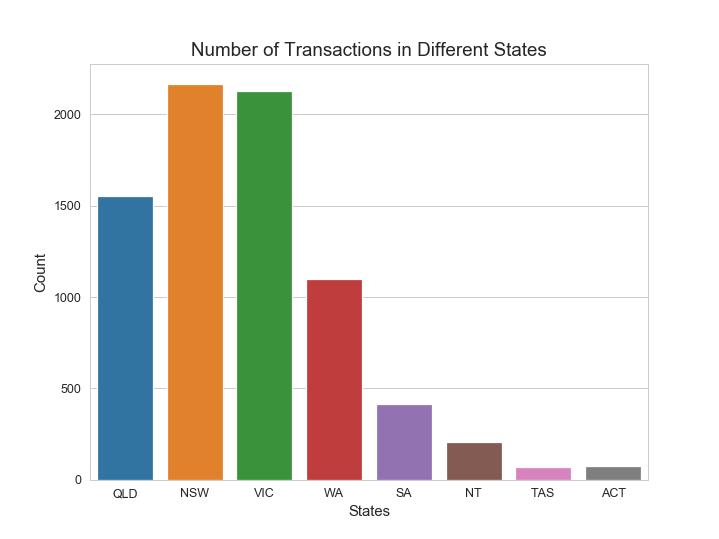

In [40]:
plt.figure(figsize=[8,6])
sns.countplot(data.merchant_state)
plt.title('Number of Transactions in Different States',fontsize=15)
plt.xlabel('States',fontsize=12)
plt.ylabel('Count',fontsize=12);

In [41]:
data.age.min()

18

In [41]:
data['age_group'] = pd.cut(data.age,bins=(15,25,35,45,55,70),labels=["Under 25","25 to 35","35 to 45","45 to 55","Above 55"])

In [42]:
data.age_group.value_counts()

Under 25    4588
25 to 35    3758
35 to 45    3016
45 to 55     457
Above 55     190
Name: age_group, dtype: int64

In [43]:
data[data['movement']=='debit'].groupby(["age_group","date"])['amount'].sum()

age_group  date      
Under 25   2018-08-01    1650.85
           2018-08-02    4188.18
           2018-08-03    2065.58
           2018-08-04    1527.11
           2018-08-05    2104.00
                          ...   
Above 55   2018-10-27     101.49
           2018-10-28     207.59
           2018-10-29      71.24
           2018-10-30      56.06
           2018-10-31      30.77
Name: amount, Length: 455, dtype: float64

In [44]:
data[data['movement']=='credit'].groupby(["age_group","date"])['amount'].sum()

age_group  date      
Under 25   2018-08-01     9317.36
           2018-08-02     5413.74
           2018-08-03    14132.04
           2018-08-06    12633.45
           2018-08-07    14037.53
                           ...   
Above 55   2018-10-25         NaN
           2018-10-26      576.00
           2018-10-29         NaN
           2018-10-30         NaN
           2018-10-31     1043.12
Name: amount, Length: 325, dtype: float64

In [45]:
date_age_amt = data[data['movement']=='debit'].groupby(['date','age_group'])['amount'].sum().reset_index().set_index("date")
under_25 = date_age_amt[date_age_amt['age_group']=='Under 25'].drop("age_group",axis=1)
age_25_35 = date_age_amt[date_age_amt['age_group']=='25 to 35'].drop("age_group",axis=1)
age_35_45 = date_age_amt[date_age_amt['age_group']=='35 to 45'].drop("age_group",axis=1)
age_45_55 = date_age_amt[date_age_amt['age_group']=='45 to 55'].drop("age_group",axis=1).fillna(0)
above_55 = date_age_amt[date_age_amt['age_group']=='Above 55'].drop("age_group",axis=1).fillna(0)

<IPython.core.display.Javascript object>


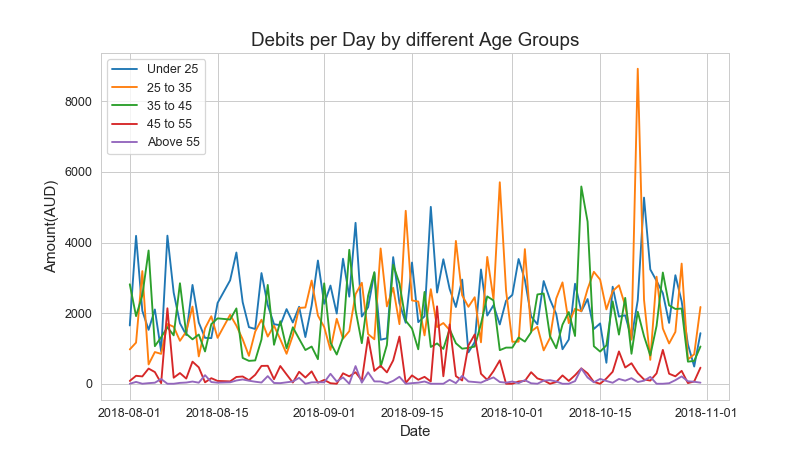

Text(0, 0.5, 'Amount(AUD)')

In [46]:
plt.figure(figsize=[9,5])
plt.plot(under_25,label="Under 25")
plt.plot(age_25_35,label="25 to 35")
plt.plot(age_35_45,label="35 to 45")
plt.plot(age_45_55,label="45 to 55")
plt.plot(above_55,label="Above 55")
plt.legend()
plt.title("Debits per Day by different Age Groups",fontsize=15);
plt.xlabel('Date',fontsize=12)
plt.ylabel('Amount(AUD)',fontsize=12)

In [48]:
data

,status,card_present_flag,bpay_biller_code,account,currency,latitude,longitude,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Day,Month,Year,age_group
0,authorized,1.0,NaN,ACC-1598451071,AUD,-27.95,153.41,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,1,8,2018,25 to 35
1,authorized,0.0,NaN,ACC-1598451071,AUD,-27.95,153.41,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,1,8,2018,25 to 35
2,authorized,1.0,NaN,ACC-1222300524,AUD,-33.94,151.23,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,1,8,2018,35 to 45
3,authorized,1.0,NaN,ACC-1037050564,AUD,-27.66,153.10,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,1,8,2018,35 to 45
4,authorized,1.0,NaN,ACC-1598451071,AUD,-27.95,153.41,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,1,8,2018,25 to 35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,-29.47,149.83,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit,31,10,2018,25 to 35
12039,authorized,1.0,NaN,ACC-1608363396,AUD,-33.87,151.22,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit,31,10,2018,Under 25
12040,authorized,1.0,NaN,ACC-3827517394,AUD,-33.89,151.12,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,31,10,2018,25 to 35
12041,authorized,1.0,NaN,ACC-2920611728,AUD,-37.76,144.96,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,31,10,2018,Above 55
